In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import ImageFile
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
train_dir= 'TRAIN_wasteclassification'
test_dir= 'TEST_wasteclassification'

In [4]:
#data processing normalization
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(244,244),
    batch_size=30,
    class_mode='categorical'
    )

Found 22564 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244,244),
    batch_size=30,
    class_mode='categorical',
    shuffle=False
)

Found 2513 images belonging to 2 classes.


In [7]:
#model building
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(244,244,3)),#3,3 is for RGB if grey image its 1 and if black and white its 2
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),#rows and columns for the pooling layer matrix
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='sigmoid')#sigmoid cause only 2 output eaither wildfire or not
])

C:\Users\prati\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    epochs=10,  # Can set higher
    validation_data=test_generator
)

Epoch 1/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 228s 301ms/step - accuracy: 0.8001 - loss: 0.4945 - val_accuracy: 0.8472 - val_loss: 0.3676
Epoch 2/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 226s 300ms/step - accuracy: 0.8406 - loss: 0.3825 - val_accuracy: 0.8655 - val_loss: 0.3085
Epoch 3/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 226s 300ms/step - accuracy: 0.8612 - loss: 0.3376 - val_accuracy: 0.8942 - val_loss: 0.2734
Epoch 4/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 226s 300ms/step - accuracy: 0.8831 - loss: 0.2906 - val_accuracy: 0.8667 - val_loss: 0.3221
Epoch 5/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 226s 300ms/step - accuracy: 0.9103 - loss: 0.2255 - val_accuracy: 0.8878 - val_loss: 0.3057
Epoch 6/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 226s 301ms/step - accuracy: 0.9316 - loss: 0.1780 - val_accuracy: 0.8918 - val_loss: 0.3311
Epoch 7/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 227s 301ms/step - accuracy: 0.9469 - loss: 0.1385 - val_accuracy: 0.8739 - val_loss: 0.4155
Epoch 8/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 227s 301ms/step - accuracy: 0.9589 -

In [30]:
print("Saving model...")
model.save('wasteclassification_model.keras') 
print("Model saved.")

Saving model...
Model saved.


In [29]:
loss,accuracy=model.evaluate(test_generator)
print(f"accuracy: {accuracy*100:.2f}")
print(f"loss: {loss*100:.2f}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8838 - loss: 0.4866
accuracy: 88.38
loss: 48.66


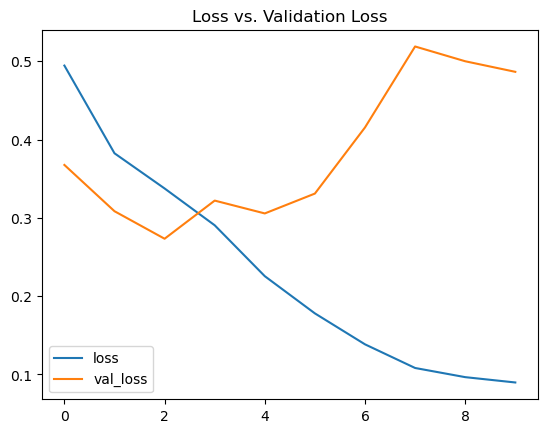

In [27]:
# --- Plotting ---
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title("Loss vs. Validation Loss")
plt.legend()
plt.show()

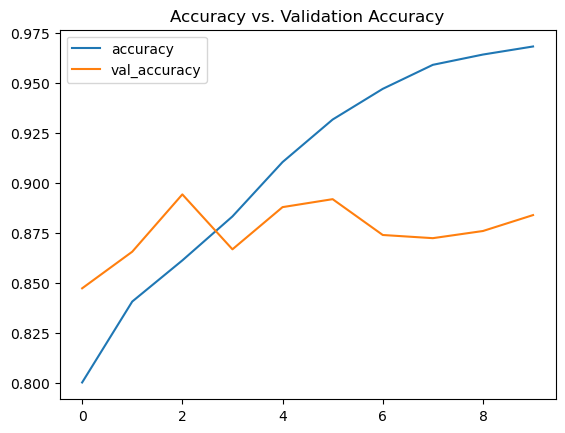

In [28]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title("Accuracy vs. Validation Accuracy")
plt.legend()
plt.show()